<a href="https://colab.research.google.com/github/tawadros312/Analysis-of-EMINST-letters-Dataset-with-MLP/blob/master/Classifying_Digits_Mnistc_with_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




### Let's get started!

We'll start running some imports, and loading the dataset. 

In [ ]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load and preprocess the data

In [ ]:
#load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
#Scalling data function 

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images / 255.
    test_images = test_images / 255.
    return train_images, test_images
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

#### Build the convolutional neural network model


* The model should take `scaled_train_images` or `scaled_test_images` as input.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.


In [ ]:
#Building the NN function

def get_model():
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer.
    Your function should return the model.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, 3, activation='relu', input_shape=(28, 28, 1), padding="SAME"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])
    return model
model = get_model()

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [ ]:
#Compile the mode function

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
compile_model(model)

#### Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 10 epochs, and return the training history to be used for plotting the learning curves.

In [ ]:
#Training the model on the scaled data

def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    
    return model.fit(scaled_train_images[..., np.newaxis], train_labels, epochs=10)
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2176 - accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0746 - accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0518 - accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0395 - accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0316 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0190 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0177 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0135 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 21s 11m

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [ ]:
# Run this cell to load the model history into a pandas DataFrame
frame = pd.DataFrame(history.history)
frame

,loss,accuracy
0,0.217614,0.935300
1,0.074567,0.976683
2,0.051834,0.983467
3,0.039480,0.987483
4,0.031623,0.989567
5,0.024390,0.992100
6,0.019004,0.994250
7,0.017738,0.994000
8,0.013531,0.995367
9,0.011837,0.995850


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

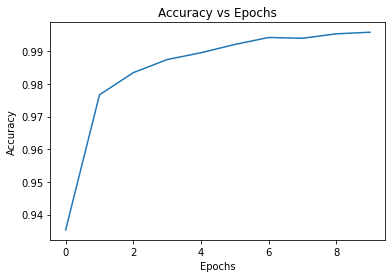

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

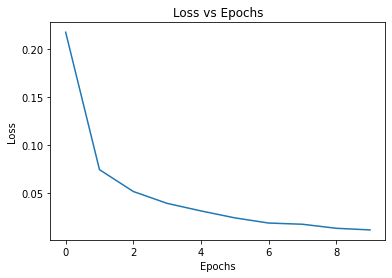

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [ ]:
#Evaluating the model

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    
    return model.evaluate(scaled_test_images[..., np.newaxis], test_labels, verbose=0)
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.07465531677007675
Test accuracy: 0.9811000227928162


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

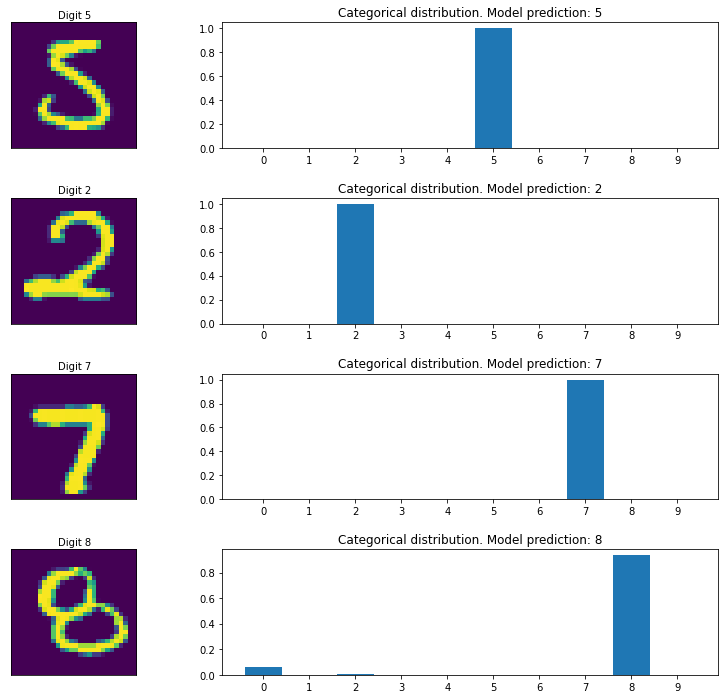

In [ ]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images[..., np.newaxis])

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(image)
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()